<h1><center>ISE 529 Midterm Exam - 10-23-2019</center></h1>

<div style="text-align: right">Zenas Huang <br>
ID: 8806603551 <br>
ISE 529 - Predictive Analytics <br>
Wednesday, 5-7:50PM Section <br>
Dr. Cesar Acosta-Mejia, Fall 2019<br></div>

Import all necessarys packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import statsmodels.api as sm
import math as m

## Question 1.
(70 pts.)<br>
Download from grouplens.org/datasets/movielens/1m/ the file ml-1m.zip. Extract the files and read the README file. The files can be opened with pd.read_csv('users.dat', sep'::', engine = 'python'). The files inclue movie ratings, movie data (genres and year), and users data (age, zip code, gender id, and, occupation). You may want to merge the three files into one by using pd.merge(pd.merge(ratings, useres), movies).

Loading the data and creating the dataframe:

In [2]:
users = pd.read_csv('users.dat', sep='::',engine = 'python')
users.columns = ['UserID','Gender','Age','Occupation','Zip-code']; #add column header names

In [3]:
movies = pd.read_csv('movies.dat', sep='::', engine='python')
movies.columns = ['MovieID','Title','Genres']; #add column header names

In [4]:
ratings = pd.read_csv('ratings.dat', sep='::', engine='python')
ratings.columns = ['UserID','MovieID','Rating','Timestamp']; #add column header names

In [5]:
df = pd.merge(pd.merge(ratings, users), movies) #merge all three files into one

The resulting dataframe is of interest in developing recommendation systems. For that purpose, a business analyst has the following questions, which you, as a data analyst should respond.

In [6]:
df.head()
#headings have to be added in on our own

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,2,1357,5,978298709,M,56,16,70072,Shine (1996),Drama|Romance
1,8,1357,4,978230800,M,25,12,11413,Shine (1996),Drama|Romance
2,10,1357,5,978227625,F,35,1,95370,Shine (1996),Drama|Romance
3,18,1357,5,978156876,F,18,3,95825,Shine (1996),Drama|Romance
4,33,1357,4,978109488,M,45,3,55421,Shine (1996),Drama|Romance


Question 1 a) Find for each movie the average ratings by gender. Show the movies with best rating by male users.

In [7]:
#creates a pivot table of movies with the average rating by each gender
df_gender_pivot = pd.pivot_table(df, index=['Title'], columns = ['Gender'],values=['Rating'],aggfunc=np.mean)

**Answer:** Average ratings of each movie by gender are given in the pivot table below. The pivot table has 3705 rows, we display the first five rows convenience and readability.

In [8]:
df_gender_pivot.head()

Rating          
Gender                                F         M
Title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024

the best rating by male users interepreted as best average rating from male users for which we display the top 5 highest average male rated movies:

In [9]:
#top 10 movies by male average rating
df_gender_pivot['Rating'].nlargest(5,'M')

Gender,F,M
Title,,
Angela (1995),3.0,5.0
"Baby, The (1973)",NaN,5.0
"Bells, The (1926)",4.0,5.0
Dangerous Game (1993),4.0,5.0
Follow the Bitch (1998),NaN,5.0


Question 1 b) Report the name of the five movies with the largest number of ratings.

In [10]:
df_ratingscount1 = df.groupby('Title').count()

In [11]:
df_ratingscount1 = df_ratingscount1[['Rating']]

In [12]:
df_ratingscount1.rename(columns={'Rating':'Number of Ratings'},inplace=True)

**Answer:** The five movies with the largest number of ratings are:

In [13]:
#The five movies with the largest number of ratings
df_ratingscount1.nlargest(5,'Number of Ratings')

,Number of Ratings
Title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2990
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672


Question 1 c) For movies with at least 250 ratings, find the average rating. Show the movies with the best average rating.

In [14]:
df_num_of_ratings =  pd.pivot_table(df, index=['Title'], columns = 'Rating',aggfunc='size',fill_value =0)

In [15]:
df_over250r = df_ratingscount1[(df_ratingscount1['Number of Ratings']>=250)]

In [16]:
titles_over250=df_over250r.index.values.tolist()

In [17]:
df_250filtered = df[df['Title'].isin(titles_over250)]

In [18]:
df_250plus = df_250filtered[['Title','Rating']]

In [19]:
df_250plus_means = df_250plus.groupby('Title').mean()

In [20]:
df_250plus_means.rename(columns={'Rating':'Average Rating'},inplace=True)

**Answer:** For movies with at least 250 ratings, we have found their average ratings in the dataframe *df_250plus_means*, for readability we show the first 5 rows of this dataframe only.

In [21]:
df_250plus_means.head() 

,Average Rating
Title,
"'burbs, The (1989)",2.910891
10 Things I Hate About You (1999),3.422857
101 Dalmatians (1961),3.596460
101 Dalmatians (1996),3.046703
12 Angry Men (1957),4.295455


Among the movies with at least 250 ratings, we are asked to display those movies with the best average rating.<br>
This is easily found by sorting *df_250plus_means*, for readability we display the top 5 best average ratings among the films with at least 250 ratings below:

In [22]:
df_250plus_means.nlargest(5,'Average Rating')

,Average Rating
Title,
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.560510
"Shawshank Redemption, The (1994)",4.554558
"Godfather, The (1972)",4.524966
"Close Shave, A (1995)",4.522866
"Usual Suspects, The (1995)",4.517106


Question 1 d) Find the movies with the highest rating by female users, from 1995 to 2000.

In [23]:
#parse out the year from each title and add a column containing only year, call it 'film year'
df_split = df['Title'].str[-5:]

In [24]:
df_split = df_split.str[:-1]

In [25]:
df['film year'] = df_split.astype(int)

In [26]:
df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,film year
0,2,1357,5,978298709,M,56,16,70072,Shine (1996),Drama|Romance,1996
1,8,1357,4,978230800,M,25,12,11413,Shine (1996),Drama|Romance,1996
2,10,1357,5,978227625,F,35,1,95370,Shine (1996),Drama|Romance,1996
3,18,1357,5,978156876,F,18,3,95825,Shine (1996),Drama|Romance,1996
4,33,1357,4,978109488,M,45,3,55421,Shine (1996),Drama|Romance,1996


In [27]:
#filter the dataframe to only films between 1995 and 2000, assign this subset
#to a new dataframe called df_yearfiltered.
df_yearfiltered = df[(df['film year'] >= 1995) & (df['film year'] <= 2000)]

In [28]:
#verify that df_yearfiltered contains only movies between 1995 and 2000
print('minimum filtered year is:', df_yearfiltered['film year'].min())
print('maximum filtered year is:', df_yearfiltered['film year'].max())

minimum filtered year is: 1995
maximum filtered year is: 2000


In [29]:
#get the unique film titles that were made in the year range from 1995 to 2000
year_range_titles = df_yearfiltered['Title'].unique()

In [30]:
#convert the unique film titles to a list
year_range_titles = list(year_range_titles)

In [31]:
#get a copy of the average rating by gender pivot table from Question 1a.
df_pivotcopy = df_gender_pivot

In [32]:
#since the index of this pivot table is the film titles
#we can filter this pivot table by its index using our year_range_titles list
#this will give us a pivot table of average ratings by gender of only the films between 1995 and 2000
df_pivotcopy = df_pivotcopy[df_pivotcopy.index.isin(year_range_titles)]

In [33]:
#Lastly, we report the movies with the highest rating by female users for movies in the 
#year range 1995-2000. Highest rating here meaning highest average female rating.
#For readability we display the top 5 only.
df_pivotcopy['Rating'].nlargest(5,'F')

Gender,F,M
Title,,
24 7: Twenty Four Seven (1997),5.0,3.750000
Ayn Rand: A Sense of Life (1997),5.0,4.000000
Belly (1998),5.0,3.000000
Bittersweet Motel (2000),5.0,NaN
Coldblooded (1995),5.0,3.588235


Question 1 e) Consider gender disagreement as the difference between the average rating of males minus the females. use part(a) to find the five movies with the largest gender disagreement.

By the question, we define gender disagreement as the difference: Male Average Rating - Female Average Rating (It was clarified by Dr. Acosta that we are not to consider the Absolute magnitude of difference). Accordingly, we can find this simply by adding another column to the df_gender_pivot table called 'Disagreement' which stores the difference between the Male and Female Average Ratings that are given for each film.

In [34]:
df_gender_pivot['Disagreement'] = df_gender_pivot['Rating']['M'] - df_gender_pivot['Rating']['F']

**Answer**: The top 5 movies with largest gender disagreement (male avg rating - female avg rating) are:

In [35]:
df_gender_pivot.nlargest(5, 'Disagreement')

Rating           Disagreement
Gender                                          F         M             
Title                                                                   
Tigrero: A Film That Was Never Made (1994)    1.0  4.333333     3.333333
Neon Bible, The (1995)                        1.0  4.000000     3.000000
Enfer, L' (1994)                              1.0  3.750000     2.750000
Stalingrad (1993)                             1.0  3.593750     2.593750
Killer: A Journal of Murder (1995)            1.0  3.428571     2.428571

Question 1 f) Plot a histogram showing the distribution of ratings of Animation and Comedy movies overlapping. Use a different color for Animation and for Comedy.

In [36]:
#create indicator columns to identify films whose Genres contain the classification 'Animation'
#and those which contain the classification 'Comedy'
df['Animation'] = df['Genres'].str.contains('Animation').astype(int)
df['Comedy'] = df['Genres'].str.contains('Comedy').astype(int)

In [37]:
df[:3]

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,film year,Animation,Comedy
0,2,1357,5,978298709,M,56,16,70072,Shine (1996),Drama|Romance,1996,0,0
1,8,1357,4,978230800,M,25,12,11413,Shine (1996),Drama|Romance,1996,0,0
2,10,1357,5,978227625,F,35,1,95370,Shine (1996),Drama|Romance,1996,0,0


In [38]:
#get the films that are animation genre and put them in a dataframe called dfanimation,
#repeat for the comedy genre films.
dfanimation = df[df['Animation'] == 1]

In [39]:
dfanimation = dfanimation[['Rating']]

In [40]:
dfcomedy = df[df['Comedy']==1]

In [41]:
dfcomedy = dfcomedy[['Rating']]

**Answer:**

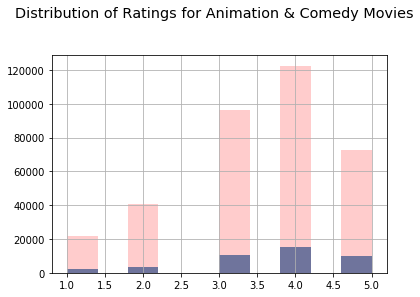

In [42]:
dfanimation['Rating'].hist(alpha=0.8,label='x', grid = True);
dfcomedy['Rating'].hist(alpha=0.2,label='x', color='r',grid = True);

plt.suptitle('Distribution of Ratings for Animation & Comedy Movies', x=0.5, y=1.05, ha='center', fontsize='x-large');
#Blue is animation, pink is comedy

Question 1 g) Find the average rating (during each year) of each genre. Show a colored line plot of average rating vs. year with a legend identifying the genre by color.

In [43]:
df.Genres.unique()

array(['Drama|Romance', 'Drama', 'Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Mystery', 'Crime|Drama',
       'Action|Adventure|Fantasy|Sci-Fi',
       'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Romance|Sci-Fi|War', 'Action|Thriller',
       'Action|Drama', 'Comedy|Drama|Western', 'Action|Adventure|Crime',
       'Action|Crime|Mystery|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Drama|War', 'Drama|Sci-Fi', 'Action|Drama|Thriller',
       'Action|Comedy|Western', 'Adventure|Comedy|Drama',
       'Drama|Thriller', 'Comedy|Romance', 'Comedy|Drama',
       'Action|Drama|Romance|Thriller', 'Action|Drama|War',
       'Action|Crime|Thriller', 'Action|Sci-Fi|Thriller',
       'Action|Horror|Sci-Fi', 'Action|Sci-Fi', 'Action|Romance|War',
       'Adventure|Drama|Romance|Sci-Fi', 'Action|Adventure|Sci-Fi',
       'Drama|Romance|War', 'Action|Drama|Romance',
       'Crime|Drama|Film-Noir|Thriller', 'Adventure|Drama|Western',
       'Action|Adventure

In [44]:
df = df[['MovieID', 'Title', 'Rating', 'Gender', 'Genres', 'film year', 'Animation', 'Comedy']]

In [45]:
df[:2]

,MovieID,Title,Rating,Gender,Genres,film year,Animation,Comedy
0,1357,Shine (1996),5,M,Drama|Romance,1996,0,0
1,1357,Shine (1996),4,M,Drama|Romance,1996,0,0


From the README file, we know that the available 18 Genres are the following:
    1. Action
	2. Adventure
	3. Animation
	4. Children's
	5. Comedy
	6. Crime
	7. Documentary
	8. Drama
	9. Fantasy
    10. Film-Noir
	11. Horror
	12. Musical
	13. Mystery
	14. Romance
	15. Sci-Fi
	16. Thriller
	17. War
	18. Western
 From which we can create a bernoulli indicator variable column for each one.

In [46]:
#define a 0-1 indicator column for each genre
df['Action'] = df['Genres'].str.contains('Action').astype(int)
df["Adventure"] = df['Genres'].str.contains('Adventure').astype(int)
df["Children's"] = df['Genres'].str.contains("Children's").astype(int)
df['Crime'] = df['Genres'].str.contains('Crime').astype(int)
df['Documentary'] = df['Genres'].str.contains('Documentary').astype(int)
df['Drama'] = df['Genres'].str.contains('Drama').astype(int)
df['Fantasy'] = df['Genres'].str.contains('Fantasy').astype(int)
df['Film-Noir'] = df['Genres'].str.contains('Film-Noir').astype(int)
df['Horror'] = df['Genres'].str.contains('Horror').astype(int)
df['Musical'] = df['Genres'].str.contains('Musical').astype(int)
df['Mystery'] = df['Genres'].str.contains('Mystery').astype(int)
df['Romance'] = df['Genres'].str.contains('Romance').astype(int)
df['Sci-Fi'] = df['Genres'].str.contains('Sci-Fi').astype(int)
df['Thriller'] = df['Genres'].str.contains('Thriller').astype(int)
df['War'] = df['Genres'].str.contains('War').astype(int)
df['Western'] = df['Genres'].str.contains('Western').astype(int)

In [47]:
#for each genre dataframe, get the average rating for the genre by film year 
dfAnimation = df[df['Animation'] == 1].groupby('film year').mean()
dfComedy = df[df['Comedy']==1].groupby('film year').mean()
dfAction = df[df['Action']==1].groupby('film year').mean()
dfAdventure = df[df["Adventure"]==1].groupby('film year').mean()
dfChildrens= df[df["Children's"] ==1].groupby('film year').mean()
dfCrime = df[df['Crime'] == 1].groupby('film year').mean()
dfDocumentary = df[df['Documentary'] == 1].groupby('film year').mean()
dfDrama = df[df['Drama'] == 1].groupby('film year').mean()
dfFantasy = df[df['Fantasy'] == 1].groupby('film year').mean()
dfFilmNoir = df[df['Film-Noir'] ==1].groupby('film year').mean()
dfHorror = df[df['Horror'] ==1].groupby('film year').mean()
dfMusical = df[df['Musical'] ==1].groupby('film year').mean()
dfMystery = df[df['Mystery'] ==1].groupby('film year').mean()
dfRomance = df[df['Romance'] ==1].groupby('film year').mean()
dfSciFi = df[df['Sci-Fi'] ==1].groupby('film year').mean()
dfThriller = df[df['Thriller'] ==1].groupby('film year').mean()
dfWar = df[df['War'] ==1].groupby('film year').mean()
dfWestern = df[df['Western'] ==1].groupby('film year').mean()

In [48]:
#collect all the genre average ratings
dfAnimation = dfAnimation[['Rating']]
dfComedy = dfComedy[['Rating']]
dfAction = dfAction[['Rating']]
dfAdventure = dfAdventure[['Rating']]
dfChildrens = dfChildrens[['Rating']]
dfCrime = dfCrime[['Rating']]
dfDocumentary = dfDocumentary[['Rating']]
dfDrama = dfDrama[['Rating']]
dfFantasy = dfFantasy[['Rating']]
dfFilmNoir = dfFilmNoir[['Rating']]
dfHorror = dfHorror[['Rating']]
dfMusical = dfMusical[['Rating']]
dfMystery = dfMystery[['Rating']]
dfRomance = dfRomance[['Rating']]
dfSciFi = dfSciFi[['Rating']]
dfThriller = dfThriller[['Rating']]
dfWar = dfWar[['Rating']]
dfWestern = dfWestern[['Rating']]

In [49]:
#rename each column
dfAnimation.rename(columns={'Rating':'Animation Rating'},inplace=True)
dfComedy.rename(columns={'Rating':'Comedy Rating'},inplace=True)
dfAction.rename(columns={'Rating':'Action Rating'},inplace=True)
dfAdventure.rename(columns={'Rating':'Adventure Rating'},inplace=True)
dfChildrens.rename(columns={'Rating':'Childrens Rating'},inplace=True)
dfCrime.rename(columns={'Rating':'Crime Rating'},inplace=True)
dfDocumentary.rename(columns={'Rating':'Docu Rating'},inplace=True)
dfDrama.rename(columns={'Rating':'Drama Rating'},inplace=True)
dfFantasy.rename(columns={'Rating':'Fantasy Rating'},inplace=True)
dfFilmNoir.rename(columns={'Rating':'FilmNoir Rating'},inplace=True)
dfHorror.rename(columns={'Rating':'Horror Rating'},inplace=True)
dfMusical.rename(columns={'Rating':'Musical Rating'},inplace=True)
dfMystery.rename(columns={'Rating':'Mystery Rating'},inplace=True)
dfRomance.rename(columns={'Rating':'Romance Rating'},inplace=True)
dfSciFi.rename(columns={'Rating':'SciFi Rating'},inplace=True)
dfThriller.rename(columns={'Rating':'Thriller Rating'},inplace=True)
dfWar.rename(columns={'Rating':'War Rating'},inplace=True)
dfWestern.rename(columns={'Rating':'Western Rating'},inplace=True);

In [50]:
#collect each genre's dataframe containing par annum average ratings into a list 
data_frames = [dfAnimation, dfComedy, dfAction, dfAdventure, dfChildrens, dfCrime, dfDocumentary, dfDrama, dfFantasy, dfFilmNoir, dfHorror, dfMusical, dfMystery, dfRomance, dfSciFi, dfThriller, dfWar, dfWestern]

In [51]:
#use a lambda function to merge all the dataframes in our list into a single aggregate dataframe called df_merged
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['film year'],
                                            how='outer'), data_frames)

In [52]:
#sort (in chronological ascending year) the aggregate df_merged on its index which is the year 
#and assign the results to df_avg_rate_by_genre
df_avg_rate_by_genre = df_merged.sort_index()

In [53]:
df_avg_rate_by_genre[-4:]

,Animation Rating,Comedy Rating,Action Rating,Adventure Rating,Childrens Rating,Crime Rating,Docu Rating,Drama Rating,Fantasy Rating,FilmNoir Rating,Horror Rating,Musical Rating,Mystery Rating,Romance Rating,SciFi Rating,Thriller Rating,War Rating,Western Rating
film year,,,,,,,,,,,,,,,,,,
1997,3.588816,3.404130,3.189289,3.171975,2.853172,3.592205,3.862306,3.635134,2.718571,4.171815,2.971195,3.055125,3.535299,3.330063,3.394219,3.341930,3.091263,NaN
1998,3.534562,3.483560,3.422993,3.085703,3.373830,3.567072,3.829310,3.575017,2.805556,3.635123,2.790507,3.231555,3.401327,3.575311,3.140860,3.311902,3.918263,3.038462
1999,3.941845,3.511473,3.320016,3.351432,3.652957,3.406271,3.874576,3.630857,3.400375,NaN,3.000758,3.805740,3.484150,3.276065,3.415543,3.504015,3.592618,2.158537
2000,3.388091,3.400387,3.465275,3.066234,3.284507,3.159375,3.523697,3.625796,2.414815,NaN,2.876956,3.820000,2.733102,3.216760,3.145584,3.235872,3.750955,NaN


**Answer:**

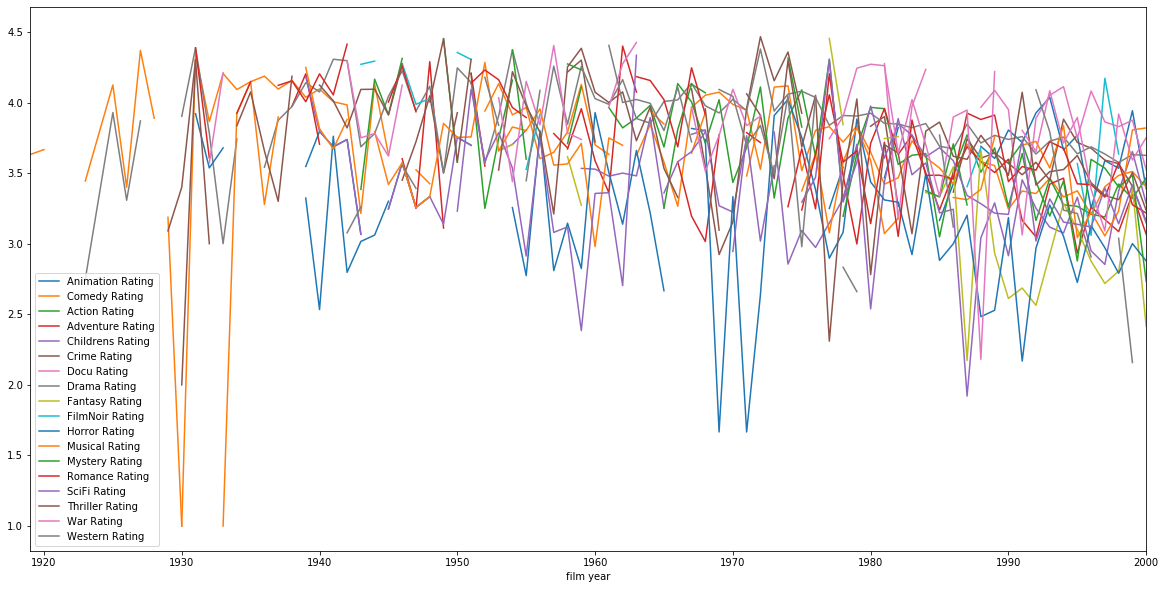

In [54]:
#plot the average rating of each genre by year in a colored line plot
df_avg_rate_by_genre.plot.line(figsize=(20,10));

## Question 2.
(30 pts.)<br>
The file Cars93.csv contains a number of NAs in columns 23 and 24. Two regression models to predict the price of a car will be found (one excluding all NAs and the other with NAs substituted properly). We will focus on substituting NAs from column 24, therefore delete the NA rows from column 23 (that is, rows 19 and 57, which happen to have two NAs). Also, delete columns Manufacturer, Model, Min.Price, Max.Price and Make. The resulting DataFrame is to be called dataframe1. Use *statsmodels library* to answer the following.

Load the Cars93 file dataset as a pandas dataframe

In [2]:
Cars93 = pd.read_csv('Cars93.csv')

Per Instruction in lecture, we will first remove the two rows containing NAs in the Rear.seat.room column.
These rows will not play a role in the problem, so we have a dataset of 91 rows. To remove these rows 19 and 57 in the excel printout, we drop rows 18 and 56 because python is zero-indexed.

In [3]:
Cars91 = Cars93.drop([18,56])

In [4]:
Cars91[:2]

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend


In [5]:
#We also will not consider Manufacturer, Model, Min.Price, Max.Price, Make.
#So we delete these columns and store the resulting dataframe as dataframe1
dataframe1 = Cars91.drop(['Manufacturer','Model','Min.Price', 'Max.Price', 'Make'], axis =1)

In [6]:
dataframe1[:3]

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Small,15.9,25,31,None,Front,4,1.8,140,6300,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA


Question 2 a) Create a new DataFrame dataframe2 by removing all NA rows. Build a regression model to predict Price using all other columns as predictors. Report the model's AIC.

In [7]:
#remove all rows where the value in the column 'Luggage.room' is NA
dataframe2 = dataframe1.dropna(subset=['Luggage.room'])

In [8]:
#examine each datatype in the fields of dataframe2
dataframe2.info()
#Cylinders (displayed as number, but object dtype, need to change to int datatype)
#The following columns need to be converted to dummy variables:
#Type (Categorical)
#AirBags (Categorical)
#DriveTrain (Categorical)
#Man.Trans.avail (Categorical)
#Origin (Categorical)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 92
Data columns (total 22 columns):
Type                  82 non-null object
Price                 82 non-null float64
MPG.city              82 non-null int64
MPG.highway           82 non-null int64
AirBags               82 non-null object
DriveTrain            82 non-null object
Cylinders             82 non-null object
EngineSize            82 non-null float64
Horsepower            82 non-null int64
RPM                   82 non-null int64
Rev.per.mile          82 non-null int64
Man.trans.avail       82 non-null object
Fuel.tank.capacity    82 non-null float64
Passengers            82 non-null int64
Length                82 non-null int64
Wheelbase             82 non-null int64
Width                 82 non-null int64
Turn.circle           82 non-null int64
Rear.seat.room        82 non-null float64
Luggage.room          82 non-null float64
Weight                82 non-null int64
Origin                82 non-null object
d

In [9]:
#first convert Cylinders to integers since they are currently stored as strings
dataframe2['Cylinders'] = dataframe2['Cylinders'].astype(int);

/Users/nomad3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
dataframe2['Cylinders'].dtype

dtype('int64')

In [11]:
# Next we want to identify the unique categories in each of the categorical fields: 
# Type (Categorical), AirBags (Categorical), DriveTrain (Categorical), Man.Trans.avail (Categorical), Origin (Categorical)
print('Type categories for dataframe2 are:', dataframe2['Type'].unique())
print('AirBags categories for dataframe2 are:', dataframe2['AirBags'].unique())
print('DriveTrain categories for dataframe2 are:', dataframe2['DriveTrain'].unique())
print('Man.trans.avail categories for dataframe2 are:', dataframe2['Man.trans.avail'].unique())
print('Origin categories for dataframe2 are:', dataframe2['Origin'].unique())

Type categories for dataframe2 are: ['Small' 'Midsize' 'Compact' 'Large' 'Sporty']
AirBags categories for dataframe2 are: ['None' 'Driver & Passenger' 'Driver only']
DriveTrain categories for dataframe2 are: ['Front' 'Rear' '4WD']
Man.trans.avail categories for dataframe2 are: ['Yes' 'No']
Origin categories for dataframe2 are: ['non-USA' 'USA']


In [12]:
#use pd.get_dummies with argument drop_first = True so that all category columns are one-hot encoded
dataframe2_withDummies = pd.get_dummies(data=dataframe2, columns=['Type','AirBags','DriveTrain','Man.trans.avail','Origin'], drop_first=True)

In [13]:
#Verify that all of our fields are now int or float datatype for the regression
dataframe2_withDummies.info()
#By examining which category is excluded from this list we can find that the base categories are:
#Type base case is 0,0,0,0 = 'Compact'
#AirBags base case is 0, 0  = 'Driver & Passenger'
#DriveTrain base case is 0, 0 = 4WD
#Man.trans.avail base case is No = 0, Yes = 1
#Origin base case is USA = 0, non-USA = 1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 92
Data columns (total 27 columns):
Price                  82 non-null float64
MPG.city               82 non-null int64
MPG.highway            82 non-null int64
Cylinders              82 non-null int64
EngineSize             82 non-null float64
Horsepower             82 non-null int64
RPM                    82 non-null int64
Rev.per.mile           82 non-null int64
Fuel.tank.capacity     82 non-null float64
Passengers             82 non-null int64
Length                 82 non-null int64
Wheelbase              82 non-null int64
Width                  82 non-null int64
Turn.circle            82 non-null int64
Rear.seat.room         82 non-null float64
Luggage.room           82 non-null float64
Weight                 82 non-null int64
Type_Large             82 non-null uint8
Type_Midsize           82 non-null uint8
Type_Small             82 non-null uint8
Type_Sporty            82 non-null uint8
AirBags_Driver only    82 

In [14]:
dataframe2_withDummies['Cylinders'] =dataframe2_withDummies['Cylinders'].astype(int);

In [15]:
#there are 82 observations in dataframe2
len(dataframe2_withDummies)

82

To build a regression model to predict Price using all the other columns of dataframe2 as predictors:

In [16]:
#select the response variable
y0 = dataframe2_withDummies.iloc[:,0]
y0[:3]

0    15.9
1    33.9
2    29.1
Name: Price, dtype: float64

In [17]:
dataframe2_withDummies.columns

Index(['Price', 'MPG.city', 'MPG.highway', 'Cylinders', 'EngineSize',
       'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers',
       'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
       'Luggage.room', 'Weight', 'Type_Large', 'Type_Midsize', 'Type_Small',
       'Type_Sporty', 'AirBags_Driver only', 'AirBags_None',
       'DriveTrain_Front', 'DriveTrain_Rear', 'Man.trans.avail_Yes',
       'Origin_non-USA'],
      dtype='object')

In [18]:
#select predictor columns
X0 = dataframe2_withDummies.iloc[:,1:28]
X0[:3]

,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,...,Type_Large,Type_Midsize,Type_Small,Type_Sporty,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Man.trans.avail_Yes,Origin_non-USA
0,25,31,4,1.8,140,6300,2890,13.2,5,177,...,0,0,1,0,0,1,1,0,1,1
1,18,25,6,3.2,200,5500,2335,18.0,5,195,...,0,1,0,0,0,0,1,0,1,1
2,20,26,6,2.8,172,5500,2280,16.9,5,180,...,0,0,0,0,1,0,1,0,1,1


In [19]:
X=X0.to_numpy()
X[:2]

array([[2.500e+01, 3.100e+01, 4.000e+00, 1.800e+00, 1.400e+02, 6.300e+03,
        2.890e+03, 1.320e+01, 5.000e+00, 1.770e+02, 1.020e+02, 6.800e+01,
        3.700e+01, 2.650e+01, 1.100e+01, 2.705e+03, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00],
       [1.800e+01, 2.500e+01, 6.000e+00, 3.200e+00, 2.000e+02, 5.500e+03,
        2.335e+03, 1.800e+01, 5.000e+00, 1.950e+02, 1.150e+02, 7.100e+01,
        3.800e+01, 3.000e+01, 1.500e+01, 3.560e+03, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]])

In [20]:
#add a constant
X1 = sm.add_constant(X)
X1[:2]

array([[1.000e+00, 2.500e+01, 3.100e+01, 4.000e+00, 1.800e+00, 1.400e+02,
        6.300e+03, 2.890e+03, 1.320e+01, 5.000e+00, 1.770e+02, 1.020e+02,
        6.800e+01, 3.700e+01, 2.650e+01, 1.100e+01, 2.705e+03, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.800e+01, 2.500e+01, 6.000e+00, 3.200e+00, 2.000e+02,
        5.500e+03, 2.335e+03, 1.800e+01, 5.000e+00, 1.950e+02, 1.150e+02,
        7.100e+01, 3.800e+01, 3.000e+01, 1.500e+01, 3.560e+03, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00]])

**Answer:**

In [21]:
#fit the model on dataframe2
model_all_columns_noNAs = sm.OLS(y0,X1).fit()

This model's AIC is: 

In [22]:
model_all_columns_noNAs.aic

509.58168708368464

In [23]:
model_all_columns_noNAs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     11.57
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           3.42e-14
Time:                        15:47:10   Log-Likelihood:                -227.79
No. Observations:                  82   AIC:                             509.6
Df Residuals:                      55   BIC:                             574.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.9552     36.350      2.200      0.032       7.107     152.803
x1            -0.3508      0.427     -0.822      0.415      -1.206       0.505
x2             0.1727      0.411      0.420      0.676      -0.652       0.997
x3             1.8693      1.197      1.562      0.124      -0.529       4.267
x4            -1.0145      2.805     -0.362      0.719      -6.636       4.607
x5             0.1364      0.047      2.916      0.005       0.043       0.230
x6            -0.0019      0.002     -0.812      0.421      -0.007       0.003
x7             0.0019      0.002      0.817      0.418      -0.003       0.006
x8             0.2582      0.535      0.483      0.631      -0.814       1.331
x9             1.9254      1.807      1.065      0.291      -1.697       5.547
x10            0.0149      0.125      0.119      0.906      -0.236       0.266
x11            0.5298      0.308      1.722      0.091      -0.087       1.146
x12           -1.8382      0.548     -3.356      0.001      -2.936      -0.741
x13           -0.4958      0.397     -1.250      0.216      -1.290       0.299
x14            0.2653      0.407      0.652      0.517      -0.550       1.080
x15            0.2561      0.349      0.733      0.467      -0.444       0.956
x16           -0.0039      0.006     -0.656      0.515      -0.016       0.008
x17            0.0102      3.591      0.003      0.998      -7.187       7.207
x18            4.0315      2.280      1.768      0.083      -0.539       8.601
x19            0.4186      2.688      0.156      0.877      -4.969       5.806
x20            4.7470      3.099      1.532      0.131      -1.463      10.957
x21           -3.0402      1.648     -1.845      0.070      -6.343       0.262
x22           -7.8500      2.078     -3.777      0.000     -12.015      -3.685
x23           -0.5527      2.744     -0.201      0.841      -6.051       4.946
x24            4.9375      3.243      1.523      0.134      -1.562      11.437
x25           -1.5489      2.311     -0.670      0.506      -6.180       3.083
x26            1.2526      1.692      0.740      0.462      -2.138       4.644
==============================================================================
Omnibus:                       12.632   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.688
Skew:                           0.691   Prob(JB):                     0.000238
Kurtosis:                       4.725   Cond. No.                     4.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
""

In [77]:
#match the names to variable names
X0.columns
#x1 = MPG.city, x2 = MPG.highway, x3 = Cylinders, x4 = EngineSize, x5 = Horsepower, x6 = RPM, x7 = Rev.per.mile
#x8 = Fuel.tank.capacity, x9 = Passengers, x10 = Length, x11 = Wheelbase, x12 = Width, x13 = Turn.circle, 
#x14 = Rear.seat.room, x15 Luggage.room, x16 = Weight, x17 = Type_Large, x18 = Type_Midsize, x19 = Type_Small
#x20 = Type_Sporty, x21 = AirBags_Driver only, x22 = AirBags_None, x23 = DriveTrain_Front, x24 = DriveTrain_Rear
#x25 = Man.trans.avail_Yes, x26 = Origin_non-USA

Index(['MPG.city', 'MPG.highway', 'Cylinders', 'EngineSize', 'Horsepower',
       'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Type_Large', 'Type_Midsize', 'Type_Small', 'Type_Sporty',
       'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Front',
       'DriveTrain_Rear', 'Man.trans.avail_Yes', 'Origin_non-USA'],
      dtype='object')

#### The fitted equation for the model using dataframe2 (when all the NA rows are all dropped): <br>
yhat = 79.955 -0.351 x1 +0.173 x2 + 1.870 x3 - 1.015 x4 + 0.136 x5 -.002 x6 + .002 x7 +0.258 x8 + 1.925 x9 + 0.015 x10 + 0.530 x11 -1.838 x12 - 0.496 x13 + 0.265 x14 + 0.256 x15 - 0.004 x16 + 0.0102 x17 + 4.032 x18 -0.419 x19 +4.747 x20 - 3.040 x21 -7.850 x22 - 0.553 x23 + 4.938 x24 -1.549 x25 +1.253 x26<br>

or equivalently, substituting in each of the appropriate variable names, we obtain:<br>

Price_hat = 79.955 -0.351(MPG.city) +0.173(MPG.highway) + 1.870(Cylinders) - 1.015(EngineSize) + 0.136(Horsepower) -.002(RPM) + .002(Rev.per.mile) +0.258(Fuel.tank.capacity) + 1.925(Passengers) + 0.015(Length) + 0.530(Wheelbase) -1.838(Width) - 0.496(Turn.circle) + 0.265(Rear.seat.room) + 0.256(Luggage.room) - 0.004(Weight) + 0.0102(Type_Large) + 4.032(Type_Midsize) -0.419(Type_Small) +4.747(Type_Sporty) - 3.040(AirBags_Driver only) -7.850(AirBags_None) - 0.553(DriveTrain_Front) + 4.938(DriveTrain_Rear) -1.549(Man.trans.avail_Yes) +1.253(Origin_non-USA)

Question 2 b) Build a regression model to predict Luggage.room using all other variables in dataframe2 excluding Type and Price. Predict Luggage.room of the rows with NAs in dataframe1. Substitute the NAs in dataframe1 with these predicted values. Call the resulting dataframe dataframe3.

**Answer:**<br>
To answer this, we return to dataframe1 which contains luggage.room nas but not the Rear.seat.room NAs
now we want to build a model to predict the missing luggage.room NAs using all other columns of the dataframe except
for Type and Price.

To do so we will want to build a regression model using the luggage.room's column without NAs regressed 
upon all the other predictor columns excluding the columns: type and price.
then using this Multiple Linear Regression fitted model, we will predict what the luggage.room should be
for each NA value of luggage.room in dataframe1
So from dataframe1, we can remove the price and type columns,then 
use pd.get_dummies for DriveTrain (Categorical), AirBags, Man.Trans.avail (Categorical), Origin (Categorical))]
Again we must also remember to change the datatype of Cylinders to int.

In [24]:
#first lets remove Price and Type and move the luggage column to the first position of the dataframe
#let's assign it to a new variable name called dataframe1a
dataframe1a = dataframe1[['Luggage.room','MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room','Weight', 'Origin']]

In [25]:
#then remove all na rows within the luggage room column that show up within dataframe1a 
dataframe1a = dataframe1a.dropna(subset=['Luggage.room'])

In [80]:
#spotcheck to verify they have been removed
dataframe1a['Luggage.room'][12:20]

12    14.0
13    13.0
14    16.0
17    20.0
19    15.0
20    14.0
21    17.0
22    11.0
Name: Luggage.room, dtype: float64

In [81]:
#now we convert cylinders to int type
dataframe1a['Cylinders'] = dataframe1a['Cylinders'].astype(int);

In [82]:
dataframe1a['Cylinders'].dtype

dtype('int64')

In [83]:
len(dataframe1a) #there are 82 observations in this luggage regression since we've again removed the NAs

82

In [84]:
#then we need to also convert AirBags, DriveTrain, Man.trans.avail, Origin into dummy variables
dataframe1a_withDummies = pd.get_dummies(data=dataframe1a, columns=['AirBags','DriveTrain','Man.trans.avail','Origin']
                                         , drop_first=True)

In [85]:
dataframe1a_withDummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 92
Data columns (total 22 columns):
Luggage.room           82 non-null float64
MPG.city               82 non-null int64
MPG.highway            82 non-null int64
Cylinders              82 non-null int64
EngineSize             82 non-null float64
Horsepower             82 non-null int64
RPM                    82 non-null int64
Rev.per.mile           82 non-null int64
Fuel.tank.capacity     82 non-null float64
Passengers             82 non-null int64
Length                 82 non-null int64
Wheelbase              82 non-null int64
Width                  82 non-null int64
Turn.circle            82 non-null int64
Rear.seat.room         82 non-null float64
Weight                 82 non-null int64
AirBags_Driver only    82 non-null uint8
AirBags_None           82 non-null uint8
DriveTrain_Front       82 non-null uint8
DriveTrain_Rear        82 non-null uint8
Man.trans.avail_Yes    82 non-null uint8
Origin_non-USA         82 no

In [86]:
#now we can fit a model for luggage.room
#select the response variable
y0a = dataframe1a_withDummies.iloc[:,0]
y0a[:3]

0    11.0
1    15.0
2    14.0
Name: Luggage.room, dtype: float64

In [87]:
#select the predictors
X0a = dataframe1a_withDummies.iloc[:,1:22]
X0a[:3]

,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,...,Width,Turn.circle,Rear.seat.room,Weight,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Man.trans.avail_Yes,Origin_non-USA
0,25,31,4,1.8,140,6300,2890,13.2,5,177,...,68,37,26.5,2705,0,1,1,0,1,1
1,18,25,6,3.2,200,5500,2335,18.0,5,195,...,71,38,30.0,3560,0,0,1,0,1,1
2,20,26,6,2.8,172,5500,2280,16.9,5,180,...,67,37,28.0,3375,1,0,1,0,1,1


In [88]:
Xa=X0a.to_numpy()
Xa[:2]

array([[2.500e+01, 3.100e+01, 4.000e+00, 1.800e+00, 1.400e+02, 6.300e+03,
        2.890e+03, 1.320e+01, 5.000e+00, 1.770e+02, 1.020e+02, 6.800e+01,
        3.700e+01, 2.650e+01, 2.705e+03, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00],
       [1.800e+01, 2.500e+01, 6.000e+00, 3.200e+00, 2.000e+02, 5.500e+03,
        2.335e+03, 1.800e+01, 5.000e+00, 1.950e+02, 1.150e+02, 7.100e+01,
        3.800e+01, 3.000e+01, 3.560e+03, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00]])

In [89]:
X1a = sm.add_constant(Xa)
X1a[:2]

array([[1.000e+00, 2.500e+01, 3.100e+01, 4.000e+00, 1.800e+00, 1.400e+02,
        6.300e+03, 2.890e+03, 1.320e+01, 5.000e+00, 1.770e+02, 1.020e+02,
        6.800e+01, 3.700e+01, 2.650e+01, 2.705e+03, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.800e+01, 2.500e+01, 6.000e+00, 3.200e+00, 2.000e+02,
        5.500e+03, 2.335e+03, 1.800e+01, 5.000e+00, 1.950e+02, 1.150e+02,
        7.100e+01, 3.800e+01, 3.000e+01, 3.560e+03, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]])

**Answer**: Model to predict Luggage.room using all other variables in dataframe2 excluding Type and Price.

In [90]:
#fit the model for predicting the missing luggage values
model_luggage_room = sm.OLS(y0a,X1a).fit()

In [91]:
model_luggage_room.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Luggage.room   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     7.989
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.09e-10
Time:                        22:32:37   Log-Likelihood:                -151.19
No. Observations:                  82   AIC:                             346.4
Df Residuals:                      60   BIC:                             399.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7456     11.920     -1.153      0.253     -37.589      10.097
x1            -0.2254      0.154     -1.464      0.148      -0.533       0.083
x2             0.3307      0.148      2.235      0.029       0.035       0.627
x3             0.6285      0.412      1.524      0.133      -0.196       1.454
x4            -0.4464      0.965     -0.463      0.645      -2.377       1.484
x5            -0.0210      0.016     -1.273      0.208      -0.054       0.012
x6            -0.0006      0.001     -0.755      0.453      -0.002       0.001
x7             0.0003      0.001      0.306      0.761      -0.001       0.002
x8             0.3622      0.183      1.983      0.052      -0.003       0.727
x9             0.4263      0.583      0.732      0.467      -0.739       1.592
x10           -0.0251      0.045     -0.553      0.582      -0.116       0.066
x11            0.0277      0.106      0.261      0.795      -0.185       0.240
x12            0.1551      0.176      0.883      0.381      -0.196       0.506
x13           -0.1053      0.146     -0.720      0.475      -0.398       0.188
x14            0.2725      0.143      1.901      0.062      -0.014       0.559
x15            0.0020      0.002      0.938      0.352      -0.002       0.006
x16            0.7139      0.609      1.172      0.246      -0.505       1.933
x17            0.5387      0.764      0.705      0.483      -0.989       2.067
x18            0.1721      0.975      0.177      0.860      -1.778       2.122
x19           -0.1496      1.182     -0.127      0.900      -2.515       2.216
x20           -0.4221      0.770     -0.549      0.585      -1.961       1.117
x21           -0.3389      0.629     -0.538      0.592      -1.598       0.920
==============================================================================
Omnibus:                       12.134   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               22.705
Skew:                           0.488   Prob(JB):                     1.17e-05
Kurtosis:                       5.386   Cond. No.                     3.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now that we have our model_luggage_room we can predict or "interpolate" what the missing NA luggage room values
could be in our original dataframe1.<br>
First let's use pd.get_dummies on our dataframe1 so that we get the same dummy variables as those of the NA susbset of rows.<br>

Notice that one cannot first get the subset of rows with missing luggage values 
and then use pd.get_dummies on the subset and then do predictions with it. This approach is *incorrect* because if one uses pd.get_dummies on the subset, you will get dummy values that are different from the original full dataset fitted model because the subset of NAs does not have the full range of categories present in each field, so pd.get_dummies on the NA rows will give an incomplete encoding and thus give incorrect prediction results. Therefore, it is necessary to first get_dummies in the original dataframe *BEFORE* you select out the subset of rows with missing luggage values from the full dataframe.

In [92]:
dataframe1_withDummies = pd.get_dummies(data=dataframe1, columns=['AirBags', 'DriveTrain', 'Man.trans.avail','Origin'], drop_first=True)

In [93]:
#the luggageroom prediction model used the following dataframe, let's see what the column order was and match it:
dataframe1a_withDummies.columns

Index(['Luggage.room', 'MPG.city', 'MPG.highway', 'Cylinders', 'EngineSize',
       'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers',
       'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
       'Weight', 'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Front',
       'DriveTrain_Rear', 'Man.trans.avail_Yes', 'Origin_non-USA'],
      dtype='object')

In [94]:
dataframe1_withDummies = dataframe1_withDummies[['Luggage.room', 'MPG.city', 'MPG.highway', 'Cylinders', 'EngineSize',
       'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers',
       'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
       'Weight', 'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Front',
       'DriveTrain_Rear', 'Man.trans.avail_Yes', 'Origin_non-USA']]

In [95]:
#since we've encoded our dummy varibles on the whole dataframe,
#we can now select out the subset of rows with missing Luggage Room values, let's assign it to dataframe1_missingLug
dataframe1_missingLug = dataframe1_withDummies[np.isnan(dataframe1_withDummies['Luggage.room'])]

In [96]:
#remember that cylinders is still an object datatype. Let's fix that real quick:
dataframe1_missingLug['Cylinders'] = dataframe1_missingLug['Cylinders'].astype(int);

/Users/nomad3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [97]:
dataframe1_missingLug['Cylinders'].dtype

dtype('int64')

In [98]:
#so now we should have a subset of all the rows where the luggage room values were missing
#and all the values datatypes should be int or float
dataframe1_missingLug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 15 to 88
Data columns (total 22 columns):
Luggage.room           0 non-null float64
MPG.city               9 non-null int64
MPG.highway            9 non-null int64
Cylinders              9 non-null int64
EngineSize             9 non-null float64
Horsepower             9 non-null int64
RPM                    9 non-null int64
Rev.per.mile           9 non-null int64
Fuel.tank.capacity     9 non-null float64
Passengers             9 non-null int64
Length                 9 non-null int64
Wheelbase              9 non-null int64
Width                  9 non-null int64
Turn.circle            9 non-null int64
Rear.seat.room         9 non-null float64
Weight                 9 non-null int64
AirBags_Driver only    9 non-null uint8
AirBags_None           9 non-null uint8
DriveTrain_Front       9 non-null uint8
DriveTrain_Rear        9 non-null uint8
Man.trans.avail_Yes    9 non-null uint8
Origin_non-USA         9 non-null uint8
dtypes: f

In [99]:
#let's remove the NaN column of Luggage.room values:
dataframe1_lugpred = dataframe1_missingLug[['MPG.city', 'MPG.highway', 'Cylinders', 'EngineSize',
       'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers',
       'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
       'Weight', 'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Front',
       'DriveTrain_Rear', 'Man.trans.avail_Yes', 'Origin_non-USA']]

In [100]:
dataframe1_lugpred

,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,...,Width,Turn.circle,Rear.seat.room,Weight,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Man.trans.avail_Yes,Origin_non-USA
15,18,23,6,3.8,170,4800,1690,20.0,7,178,...,74,44,30.5,3715,0,1,1,0,0,0
16,15,20,6,4.3,165,4000,1790,27.0,8,194,...,78,42,33.5,4025,0,1,0,0,0,0
25,17,21,6,3.0,142,5000,1970,20.0,7,175,...,72,42,26.5,3705,1,0,0,0,0,0
35,15,20,6,3.0,145,4800,2080,21.0,7,176,...,72,45,30.0,3735,1,0,0,0,1,0
55,18,24,6,3.0,155,5000,2240,19.6,7,190,...,72,39,27.5,3735,0,1,0,0,0,1
65,17,23,6,3.0,151,4800,2065,20.0,7,190,...,74,41,27.0,4100,0,1,1,0,0,1
69,18,23,6,3.8,170,4800,1690,20.0,7,194,...,74,44,30.5,3715,0,1,1,0,0,0
86,18,22,4,2.4,138,5000,2515,19.8,7,187,...,71,41,35.0,3785,1,0,0,0,1,1
88,17,21,5,2.5,109,4500,2915,21.1,7,187,...,72,38,34.0,3960,0,1,1,0,1,1


In [101]:
dataframe1_missingLug.index

Int64Index([15, 16, 25, 35, 55, 65, 69, 86, 88], dtype='int64')

There are 21 columns in this subset of missing lug room dataframe, which matches exactly the 21
columns that are in our fitted model_luggage_room. Now we need to use this dataframe1_lugpred, convert it to a numpy array, add a constant and then call model_luggage_room.predict() on this subset.<br>

Then once we have the correctly interpolated luggage values, we can return to dataframe1 and fill in all the NA luggage values with the predicted luggage room values from model_luggage_room and store this complete dataset in dataframe3.

In [102]:
dataframe1_lugpred['Cylinders'] = dataframe1_lugpred['Cylinders'].astype(int);

/Users/nomad3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
list1 = list(dataframe1_lugpred.columns)
list1.insert(0,'constant')

In [104]:
predvals0 = dataframe1_lugpred.to_numpy()

In [105]:
predvals = sm.add_constant(predvals0)

In [106]:
x = pd.DataFrame(predvals,columns = list1)

In [107]:
x #notice that we have lost the original index row positions of the NA luggage rows from dataframe1

,constant,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,...,Width,Turn.circle,Rear.seat.room,Weight,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Man.trans.avail_Yes,Origin_non-USA
0,1.0,18.0,23.0,6.0,3.8,170.0,4800.0,1690.0,20.0,7.0,...,74.0,44.0,30.5,3715.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,15.0,20.0,6.0,4.3,165.0,4000.0,1790.0,27.0,8.0,...,78.0,42.0,33.5,4025.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,17.0,21.0,6.0,3.0,142.0,5000.0,1970.0,20.0,7.0,...,72.0,42.0,26.5,3705.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,15.0,20.0,6.0,3.0,145.0,4800.0,2080.0,21.0,7.0,...,72.0,45.0,30.0,3735.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,18.0,24.0,6.0,3.0,155.0,5000.0,2240.0,19.6,7.0,...,72.0,39.0,27.5,3735.0,0.0,1.0,0.0,0.0,0.0,1.0
5,1.0,17.0,23.0,6.0,3.0,151.0,4800.0,2065.0,20.0,7.0,...,74.0,41.0,27.0,4100.0,0.0,1.0,1.0,0.0,0.0,1.0
6,1.0,18.0,23.0,6.0,3.8,170.0,4800.0,1690.0,20.0,7.0,...,74.0,44.0,30.5,3715.0,0.0,1.0,1.0,0.0,0.0,0.0
7,1.0,18.0,22.0,4.0,2.4,138.0,5000.0,2515.0,19.8,7.0,...,71.0,41.0,35.0,3785.0,1.0,0.0,0.0,0.0,1.0,1.0
8,1.0,17.0,21.0,5.0,2.5,109.0,4500.0,2915.0,21.1,7.0,...,72.0,38.0,34.0,3960.0,0.0,1.0,1.0,0.0,1.0,1.0


In [108]:
#get the predictions for luggage room for each of the rows that have NA values for luggage room
d2 = model_luggage_room.get_prediction(x)

In [109]:
missing_luggage = d2.summary_frame(alpha =.05)[['mean']]
missing_luggage

,mean
0,18.085325
1,22.860661
2,17.469135
3,18.484475
4,17.592445
5,18.727647
6,17.683751
7,18.134136
8,20.708602


In [110]:
#just as an aside, our luggage model has AIC value of 346.4 
model_luggage_room.aic

346.37078569869766

Let's recover the original row numbers by assigning the index of the missing_luggage to be the same as the
rows from which we had NAs in dataframe1.

In [111]:
missinglist = list(dataframe1_lugpred.index)

In [112]:

missing_luggage.index = missinglist

In [113]:
missing_luggage = missing_luggage.rename(columns={'mean':'predicted luggage room'})

In [114]:
missing_luggage

,predicted luggage room
15,18.085325
16,22.860661
25,17.469135
35,18.484475
55,17.592445
65,18.727647
69,17.683751
86,18.134136
88,20.708602


Note the means here are the interpolated luggage rooms values for each of the 9 NA columns. However, despite the fact that the luggage room values are stored as floats within the original dataframe, since the numbers are displayed as whole integers in the dataframe, we should round our predicted values to nearest integer values in order to be consistent with the rest of the data in the luggage.room column prior to running our price regression as a matter of good industry standards and practices.

In [115]:
missing_luggage = missing_luggage.round()

**Answer:** Rounded predicted Luggage Room for each of our NA rows in dataframe1

In [116]:
missing_luggage

,predicted luggage room
15,18.0
16,23.0
25,17.0
35,18.0
55,18.0
65,19.0
69,18.0
86,18.0
88,21.0


In [117]:
#get the row numbers of the NAs in dataframe1
missing_luggage.index

Int64Index([15, 16, 25, 35, 55, 65, 69, 86, 88], dtype='int64')

In [118]:
#make a dictionary of the predicted luggage values and the NA row numbers
NA_position_dict = pd.Series(missing_luggage['predicted luggage room'].values,index=missing_luggage.index).to_dict()

In [119]:
NA_position_dict

{15: 18.0,
 16: 23.0,
 25: 17.0,
 35: 18.0,
 55: 18.0,
 65: 19.0,
 69: 18.0,
 86: 18.0,
 88: 21.0}

In [120]:
#use a forloop to fill in the predicted luggage room values back into dataframe1's NA cells
for i in NA_position_dict.keys():
    dataframe1.at[i,'Luggage.room'] = NA_position_dict[i]

In [121]:
#verify the NAs were filled in
dataframe1['Luggage.room'][:20]

0     11.0
1     15.0
2     14.0
3     17.0
4     13.0
5     16.0
6     17.0
7     21.0
8     14.0
9     18.0
10    14.0
11    13.0
12    14.0
13    13.0
14    16.0
15    18.0
16    23.0
17    20.0
19    15.0
20    14.0
Name: Luggage.room, dtype: float64

**Answer:** Assign the full dataset with substituted Luggage.room values to dataframe3

In [122]:
#assign it to dataframe3
dataframe3 = dataframe1

In [123]:
#note dataframe3 has no missing NA values.
dataframe3['Luggage.room'][14:30]

14    16.0
15    18.0
16    23.0
17    20.0
19    15.0
20    14.0
21    17.0
22    11.0
23    13.0
24    14.0
25    17.0
26    16.0
27    11.0
28    11.0
29    15.0
30    12.0
Name: Luggage.room, dtype: float64

In [124]:
dataframe3.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Small,15.9,25,31,None,Front,4,1.8,140,6300,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


Question 1 c) Use dataframe3 to build a regression model to predict Price using all other variables in this dataframe. Report the model's AIC. How does it compare with the AIC of the model found in part (a)?

In [125]:
dataframe3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 92
Data columns (total 22 columns):
Type                  91 non-null object
Price                 91 non-null float64
MPG.city              91 non-null int64
MPG.highway           91 non-null int64
AirBags               91 non-null object
DriveTrain            91 non-null object
Cylinders             91 non-null object
EngineSize            91 non-null float64
Horsepower            91 non-null int64
RPM                   91 non-null int64
Rev.per.mile          91 non-null int64
Man.trans.avail       91 non-null object
Fuel.tank.capacity    91 non-null float64
Passengers            91 non-null int64
Length                91 non-null int64
Wheelbase             91 non-null int64
Width                 91 non-null int64
Turn.circle           91 non-null int64
Rear.seat.room        91 non-null float64
Luggage.room          91 non-null float64
Weight                91 non-null int64
Origin                91 non-null object
d

In [126]:
#change cylinders datatype
dataframe3['Cylinders'] = dataframe3['Cylinders'].astype(int);

In [127]:
dataframe3['Cylinders'].dtype

dtype('int64')

In [128]:
dataframe3_withDummies = pd.get_dummies(data=dataframe3, columns = ['Type', 'AirBags','DriveTrain','Man.trans.avail','Origin'],drop_first = True)

In [129]:
dataframe3_withDummies.columns

Index(['Price', 'MPG.city', 'MPG.highway', 'Cylinders', 'EngineSize',
       'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers',
       'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
       'Luggage.room', 'Weight', 'Type_Large', 'Type_Midsize', 'Type_Small',
       'Type_Sporty', 'Type_Van', 'AirBags_Driver only', 'AirBags_None',
       'DriveTrain_Front', 'DriveTrain_Rear', 'Man.trans.avail_Yes',
       'Origin_non-USA'],
      dtype='object')

In [130]:
dataframe3_withDummies.head()

,Price,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,...,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Man.trans.avail_Yes,Origin_non-USA
0,15.9,25,31,4,1.8,140,6300,2890,13.2,5,...,0,1,0,0,0,1,1,0,1,1
1,33.9,18,25,6,3.2,200,5500,2335,18.0,5,...,1,0,0,0,0,0,1,0,1,1
2,29.1,20,26,6,2.8,172,5500,2280,16.9,5,...,0,0,0,0,1,0,1,0,1,1
3,37.7,19,26,6,2.8,172,5500,2535,21.1,6,...,1,0,0,0,0,0,1,0,1,1
4,30.0,22,30,4,3.5,208,5700,2545,21.1,4,...,1,0,0,0,1,0,0,1,1,1


In [131]:
#select the response variable
y0 = dataframe3_withDummies.iloc[:,0]
y0[:3]

0    15.9
1    33.9
2    29.1
Name: Price, dtype: float64

In [132]:
dataframe3_withDummies.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
            70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
            87, 88, 89, 90, 91, 92],
           dtype='int64')

In [133]:
#select all of the predictor columns 
X0 = dataframe3_withDummies.iloc[:,1:29]
X0[:3]

,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,...,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Man.trans.avail_Yes,Origin_non-USA
0,25,31,4,1.8,140,6300,2890,13.2,5,177,...,0,1,0,0,0,1,1,0,1,1
1,18,25,6,3.2,200,5500,2335,18.0,5,195,...,1,0,0,0,0,0,1,0,1,1
2,20,26,6,2.8,172,5500,2280,16.9,5,180,...,0,0,0,0,1,0,1,0,1,1


In [134]:
X0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 92
Data columns (total 27 columns):
MPG.city               91 non-null int64
MPG.highway            91 non-null int64
Cylinders              91 non-null int64
EngineSize             91 non-null float64
Horsepower             91 non-null int64
RPM                    91 non-null int64
Rev.per.mile           91 non-null int64
Fuel.tank.capacity     91 non-null float64
Passengers             91 non-null int64
Length                 91 non-null int64
Wheelbase              91 non-null int64
Width                  91 non-null int64
Turn.circle            91 non-null int64
Rear.seat.room         91 non-null float64
Luggage.room           91 non-null float64
Weight                 91 non-null int64
Type_Large             91 non-null uint8
Type_Midsize           91 non-null uint8
Type_Small             91 non-null uint8
Type_Sporty            91 non-null uint8
Type_Van               91 non-null uint8
AirBags_Driver only    91 no

In [135]:
X = X0.to_numpy()

In [136]:
X1 = sm.add_constant(X)
X1[:2]

array([[1.000e+00, 2.500e+01, 3.100e+01, 4.000e+00, 1.800e+00, 1.400e+02,
        6.300e+03, 2.890e+03, 1.320e+01, 5.000e+00, 1.770e+02, 1.020e+02,
        6.800e+01, 3.700e+01, 2.650e+01, 1.100e+01, 2.705e+03, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.800e+01, 2.500e+01, 6.000e+00, 3.200e+00, 2.000e+02,
        5.500e+03, 2.335e+03, 1.800e+01, 5.000e+00, 1.950e+02, 1.150e+02,
        7.100e+01, 3.800e+01, 3.000e+01, 1.500e+01, 3.560e+03, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]])

In [137]:
model_luggage_interpolated = sm.OLS(y0,X1).fit()

In [138]:
model_luggage_interpolated.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     12.37
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           2.72e-16
Time:                        22:32:38   Log-Likelihood:                -249.38
No. Observations:                  91   AIC:                             554.8
Df Residuals:                      63   BIC:                             625.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.3964     33.168      2.665      0.010      22.115     154.678
x1            -0.2679      0.396     -0.676      0.501      -1.059       0.524
x2             0.1359      0.384      0.354      0.725      -0.632       0.904
x3             1.4897      1.033      1.442      0.154      -0.575       3.554
x4            -0.9435      2.561     -0.368      0.714      -6.061       4.174
x5             0.1429      0.042      3.396      0.001       0.059       0.227
x6            -0.0023      0.002     -1.068      0.290      -0.006       0.002
x7             0.0016      0.002      0.785      0.435      -0.003       0.006
x8             0.2811      0.472      0.595      0.554      -0.663       1.225
x9             1.8128      1.686      1.075      0.286      -1.556       5.181
x10            0.0473      0.104      0.456      0.650      -0.160       0.255
x11            0.3718      0.246      1.514      0.135      -0.119       0.862
x12           -1.8043      0.500     -3.607      0.001      -2.804      -0.805
x13           -0.5700      0.339     -1.681      0.098      -1.247       0.107
x14            0.2813      0.334      0.843      0.402      -0.385       0.948
x15            0.2646      0.331      0.800      0.427      -0.396       0.925
x16           -0.0028      0.005     -0.583      0.562      -0.012       0.007
x17            0.2176      3.289      0.066      0.947      -6.354       6.789
x18            3.9093      2.108      1.854      0.068      -0.303       8.122
x19            0.3519      2.471      0.142      0.887      -4.586       5.290
x20            4.7081      2.831      1.663      0.101      -0.949      10.365
x21            2.2027      5.064      0.435      0.665      -7.916      12.322
x22           -3.2003      1.548     -2.068      0.043      -6.293      -0.108
x23           -7.5322      1.905     -3.955      0.000     -11.338      -3.726
x24            1.1479      2.003      0.573      0.569      -2.855       5.151
x25            6.3684      2.730      2.333      0.023       0.914      11.823
x26           -1.9476      2.038     -0.956      0.343      -6.019       2.124
x27            1.3637      1.508      0.904      0.369      -1.650       4.377
==============================================================================
Omnibus:                       15.872   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.004
Skew:                           0.711   Prob(JB):                     2.26e-06
Kurtosis:                       5.199   Cond. No.                     4.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+05. This might i

In [139]:
X0.columns #then match the predictor names to each of the model's x predictor's to write the fitted equation.

Index(['MPG.city', 'MPG.highway', 'Cylinders', 'EngineSize', 'Horsepower',
       'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Type_Large', 'Type_Midsize', 'Type_Small', 'Type_Sporty',
       'Type_Van', 'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Front',
       'DriveTrain_Rear', 'Man.trans.avail_Yes', 'Origin_non-USA'],
      dtype='object')

#### The full fitted equation with interpolated NA columns is: (part(c) model, 27 predictors, 91 observations)
yhat = 88.396 -0.268 x1 +0.136 x2 +1.490 x3 -0.944 x4+0.143 x5 -0.002 x6 + 0.002 x7 +0.281 x8 + 1.813 x9 + 0.047 x10 +0.372 x11 -1.804 x12 -0.570 x13 +0.281 x14+0.265 x15 - 0.003 x16 +0.218 x17 + 3.909 x18  +0.352 x19 + 4.708 x20 +2.203 x21 -3.200 x22 -7.532 x23 +1.148 x24 +6.368 x25 -1.948 x26 +1.364 x27

or equivalently, with the variable names subsituted in:

Price_hat = 88.396 -0.268 (MPG.city) +0.136 (MPG.highway) +1.490 (Cylinders) -0.944 (EngineSize)+0.143 (Horsepower) -0.002 (RPM) + 0.002 (Rev.per.mile) +0.281 (Fuel.tank.capacity) + 1.813 (Passengers) + 0.047 (Length) +0.372 (Wheelbase) -1.804 (Width) -0.570 (Turn.circle) +0.281 (Rear.seat.room) +0.265 (Luggage.room) - 0.003 (Weight) +0.218 (Type_Large) + 3.909 (Type_Midsize)  +0.352 (Type_Small) + 4.708 (Type_Sporty) +2.203 (Type_Van) -3.200 (AirBags_Driver only) -7.532 (AirBags_None) +1.148 (DriveTrain_Front) +6.368 (DriveTrain_Rear) -1.948 (Man.trans.avail_Yes) +1.364 (Origin_non-USA)


For side-by-side comparison we list the previous fitted model with 81 observations below:

#### The fitted Equation when NA rows are all dropped is:  (part(a) model, 26 predictors, 82 observations)
yhat = 79.955 -0.351 x1 +0.173 x2 + 1.870 x3 - 1.015 x4 + 0.136 x5 -.002 x6 + .002 x7 +0.258 x8 + 1.925 x9 + 0.015 x10 + 0.530 x11 -1.838 x12 - 0.496 x13 + 0.265 x14 + 0.256 x15 - 0.004 x16 + 0.0102 x17 + 4.032 x18 -0.419 x19 +4.747 x20 - 3.040 x21 -7.850 x22 - 0.553 x23 + 4.938 x24 -1.549 x25 +1.253 x26

or equivalently, with the variable names substituted in:

Price_hat = 79.955 -0.351(MPG.city) +0.173(MPG.highway) + 1.870(Cylinders) - 1.015(EngineSize) + 0.136(Horsepower) -.002(RPM) + .002(Rev.per.mile) +0.258(Fuel.tank.capacity) + 1.925(Passengers) + 0.015(Length) + 0.530(Wheelbase) -1.838(Width) - 0.496(Turn.circle) + 0.265(Rear.seat.room) + 0.256(Luggage.room) - 0.004(Weight) + 0.0102(Type_Large) + 4.032(Type_Midsize) -0.419(Type_Small) +4.747(Type_Sporty) - 3.040(AirBags_Driver only) -7.850(AirBags_None) - 0.553(DriveTrain_Front) + 4.938(DriveTrain_Rear) -1.549(Man.trans.avail_Yes) +1.253(Origin_non-USA)



**Answer:**<br>We note that the model in part (a) has 26 predictors and 82 observations while the model in part (c) has 27 predictors and 91 observations. This is because in dropping the NA rows in part (a), the model also removes one type of car, namely the "Van" type, and so the one-hot encoding of dummy variables has one less category resulting in one fewer dummy variable in the part (a) model, which I call model_all_columns_noNAs (26 predictors, 82 obs), versus the part (c) model which I call model_luggage_interpolated (27 predictors, 91 obs).<br>

Below, we report this model's AIC  and compare it to the AIC of the model found in part(a):

In [140]:
print('The model in part(a), using dataframe2, has an AIC of:',model_all_columns_noNAs.aic)
print('The model in part (c), using dataframe3, has an AIC of:', model_luggage_interpolated.aic)

The model in part(a), using dataframe2, has an AIC of: 509.58168708368464
The model in part (c), using dataframe3, has an AIC of: 554.7671351448183


We see that the model with all 91 observations, using interpolated luggage values, has a larger (worse) AIC than the price model in part(a) with 82 observations, excluding all the NA rows. This worsening of AIC occurse because, although our SSE has decreased with the expanded model in part(a), the decrease was not sufficient to offset the increase in observations (recalling that the formula for AIC is given by n*log(SSE/n)+2p. We verify this directionally using the formulas below.

In [141]:
SSE_noNAs = model_all_columns_noNAs.mse_resid*len(dataframe2_withDummies) #82 observations, 26 predictors
SSE_interpolated = model_luggage_interpolated.mse_resid*len(dataframe3_withDummies) #91 observations, 27 predictors
print('the model in part (a) has an SSE value of', SSE_noNAs)
print('the model in part (c) has an SSE value of', SSE_interpolated)

the model in part (a) has an SSE value of 1852.150129961122
the model in part (c) has an SSE value of 1847.6405935857301


Therefore, we can confirm that the SSE decreases as we go from part(b)'s model to using the expanded model with interpolated luggage values in part (c).

In [142]:
AIC_82 = 82*m.log(SSE_noNAs/82) + 2*(26)
AIC_91 = 91*m.log(SSE_interpolated/91)+2*(27)
print('the part (a) model formulaically has an AIC value of:',AIC_82)
print('the part (c) model formulaically has an AIC value of:',AIC_91)

the part (a) model formulaically has an AIC value of: 307.62542472472444
the part (c) model formulaically has an AIC value of: 327.9832770929718


Therefore, we can confirm there is an increase (worsening) of AIC as we go from part(a)'s model to part(b)'s model. Most likely, this is a result of both the increased number of observations,n, and the additional predictor.